# Reinforcement Learning

# I. Overview

The objective of this assignment is implement Reinforcement Learning approaches to solve following problems:
* Maze
* BlackJack

For each of the problems, two classes are defined - Environment Class and Agent Class. Environment class keeps track of current state and its associated attributes, while Agent class performs the actions using Reinforcement Learning. The classes are defined in details in further sections. The experiment includes training the agent using the Temporal Difference learning approaches and then the model is tested against the problem. Also, in later sections experiments are performed with different various sets of parameters to determine ideal values for each of the model parameter.

# II. Problems 

## A. Maze Problem (Practice)

_Describe the problem. Read the following code and explain the GridWorld environment._

The Maze Problem is a world which consists of a grid made of an arbitrary number of squares. Each square of this grid can have one of four different values:
* A Hurdle (represented by H in this case)
* An Open Space (represented by O in this case)
* A Goal Location (represented by G in this case)

One of the open spaces is the starting position. The task in this problem is to navigate through the maze from the starting position and find the way to the goal. From each square there are four possible actions: left, right, up and down, which change the state accordingly except when such movement would put the agent in a wall or outside the maze, in which case it doesn't move (the state doesn't change).

In [1]:
import collections
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Sample Grid Environment File

Simple text file with three characters, 'O', 'H', and 'G'.
- 'O': open space
- 'H': Wall or obstacles
- 'G': Goal location 

In [2]:
%%bash 
cat grid.txt

OOOHOOOOO
OOOHOOHOO
OOOOOOHOO
OOOOHHHOO
OOHOOOOOH
OOHOOOGOO
OOOOOOOOO

### GridWorld Environment
The GridWorld environment class implements the maze environment. Most of the methods in the GridWorld class pretty straightforward. The two special method are "check_state" and "next". Logic implemented by these methods is:

* **check_state**: It checks whether a state is a valid state. The method will take a 2d array as parameter, containing indices in the grid. If the indices are going outside the grid, method will return "N". If the grid is invalid, it will return "F"

* **next**: The next method updates current state based on the given action (parameter a). If the new state is a Hurdle (H) or is outside the maze (N), the method will return -5 reward. For an invalid state (F) also, it will return -5. For the Goal State (G), the method will return +30 reward, otherwise for a normal step, it will return -1 reward. 
 

### GridWorld Class


In [3]:
# maze example

class GridWorld:
    """ Grid World environment
            there are four actions (left, right, up, and down) to move an agent
            In a grid, if it reaches a goal, it get 30 points of reward.
            If it falls in a hole or moves out of the grid world, it gets -5.
            Each step costs -1 point. 

        to test GridWorld, run the following sample codes:

            env = GridWorld('grid.txt')

            env.print_map()
            print [2,3], env.check_state([2,3])
            print [0,0], env.check_state([0,0])
            print [3,4], env.check_state([3,4])
            print [10,3], env.check_state([10,3])

            env.init([0,0])
            print env.next(1)  # right
            print env.next(3)  # down
            print env.next(0)  # left
            print env.next(2)  # up
            print env.next(2)  # up

        Parameters
        ==========
        _map        ndarray
                    string array read from a file input
        _size       1d array
                    the size of _map in ndarray
        goal_pos    tuple
                    the index for the goal location
        _actions    list
                    list of actions for 4 actions
        _s          1d array
                    current state
    """
    def __init__(self, fn):
        # read a map from a file
        self._map = self.read_map(fn)
        self._size = np.asarray(self._map.shape)
        self.goal_pos = np.where(self._map == 'G')

        # definition of actions (left, right, up, and down repectively)
        self._actions = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self._s = None

    def get_cur_state(self):
        return self._s

    def get_size(self):
        return self._size

    def read_map(self, fn):
        grid = []
        with open(fn) as f:
            for line in f:
               grid.append(list(line.strip()))
        return np.asarray(grid)

    def print_map(self):
        print( self._map )

    def check_state(self, s):
        if isinstance(s, collections.Iterable) and len(s) == 2:
            if s[0] < 0 or s[1] < 0 or\
               s[0] >= self._size[0] or s[1] >= self._size[1]:
               return 'N'
            return self._map[tuple(s)].upper()
        else:
            return 'F'  # wrong input

    def init(self, state=None):
        if state is None:
            s = [0, 0]
        else:
            s = state

        if self.check_state(s) == 'O':
            self._s = np.asarray(state)
        else:
            raise ValueError("Invalid state for init")

    def next(self, a):
        s1 = self._s + self._actions[a]
        # state transition
        curr = self.check_state(s1)
        
        if curr == 'H' or curr == 'N':
            return -5 # Hit the wall
        elif curr == 'F':
            warnings.warn("invalid state " + str(s1))
            return -5 # Invalid state
        elif curr == 'G':
            self._s = s1
            return 30 # Reward for reaching the goal
        else:
            self._s = s1
            return -1 # Eash Step
        
    def is_goal(self):
        return self.check_state(self._s) == 'G'
            
    def get_actions(self):
        return self._actions

In [4]:
env = GridWorld("grid.txt")
env.print_map()

[['O' 'O' 'O' 'H' 'O' 'O' 'O' 'O' 'O']
 ['O' 'O' 'O' 'H' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'H' 'H' 'H' 'O' 'O']
 ['O' 'O' 'H' 'O' 'O' 'O' 'O' 'O' 'H']
 ['O' 'O' 'H' 'O' 'O' 'O' 'G' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']]


In [5]:
# top-left to (0,0)
def coord_convert(s, sz):
    return [s[1], sz[0]-s[0]-1]

## B. Blackjack-V0

![](https://upload.wikimedia.org/wikipedia/commons/a/a2/Blackjack_game_1.JPG)

Now, we play Blackjack! 
https://gym.openai.com/envs/Blackjack-v0/


# III. Methods

- _Decide your TD learning approach: SARSA or Q-learning? _
- _Describe your approach and the reason why you select it._
- _Finish epsilon_greedy function and other TODOs. Explain it._
- _Explain your codes._

The TD learning approach used in this assignment is SARSA

## SARSA & Q-Learning
In the Q-Learning approach, we learn the Q value for each state-action pair. We start by setting all Q values to 0 and go around and explore the state-action space. After an action is tried on a state, we evaluate the state that it has lead to. If it has lead to an undesirable outcome we reduce the Q value of that action from that state so that other actions will have a greater value and be chosen instead the next time. Similarly, if a reward is received for taking  a particular action, the weight of that action for that state is increased, so we are more likely to choose it again the next time.

Now here, we also consider the learning rate (α) and discounting factor (γ). In TD learning, we update the value of a state-action using following relation:
$$
    \begin{align}
        V(s_t) &\leftarrow R_{t+1} + \alpha (R_{t+1} + \gamma \hat{V}(s_{t+1}) - V(s_t))
    \end{align}
$$

For Q-Learning/SARSA the state-action value is represented by Q(s, a). We can update the Q-value with following formulas.

** Q-Learning **
$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma \max_a Q(s_{t+1}, a) - Q(s_t, a_t)) 
$$

** SARSA **
$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)) 
$$

### Why SARSA
The SARSA algorithm is very similar to Q-Learning. The only difference it, to update the Q-value, we assume that the standard policy is followed, while in the Q-Learning will always pick the most promising action. Hence, the Q-value is updated by following relation for Q-Learning.

$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma \max_a Q(s_{t+1}, a) - Q(s_t, a_t)) 
$$

While, Q-Learning employs greedy move to update the Q-value, the SARSA will allow exploration of additional states. That is why it is chosen. 

## RLAgent for Maze

_Read the understand the codes below and explain it with your words. 
Do NOT forget to answer the question. _

The class RLAgent implements the SARSA agent for GridWorld environment. The function of each method is:
* **__init__**: It initializes the agent by setting the environment and initializing the Q values for each state-action pair to 0
* **epsilon_greedy**: This function selects the greedy move based on the Q-values of given state "s". It also takes a parameter "epsilon", which prevents over-fitting by returning sometimes preventing the greedy selection.
* **train**: The "train" method trains the Q values for given environment. It implements the SARSA algorithm. The parameters of this method are:
    * **start**: start state of the environment
    * **gamma**: discounting factor
    * **alpha**: learning rate
    * **epsilon**: factor to prevent over-fitting
* **test**: The "test" method executes trained agent on the given environment

### Why is this zero?
The iteration will terminate if the selected action will lead to goal state. Hence, there will never be a situation when the Q-values for goal state will be changed.

In [6]:
from operator import add
from operator import sub

class RLAgent: 
    """
        Reinforcement Learning Agent Model for training/testing
        with Tabular function approximation
        
    """
    
    def __init__(self, evn):
        self.env = env
        self.size = env.get_size()
        self.n_a = len(env.get_actions())
        # self.Q table including the surrounding border
        self.Q = np.zeros((self.size[0], self.size[1], self.n_a))
    
    def epsilon_greed(self, epsilon, s):
        """
            Epsilon greedy function to select the next action
            epsilon - value is the exploration factor that prevents overfitting
            by allowing exploration of other states
            s - The current state
        """
        # TODO: Finish this function
        if np.random.rand() < epsilon:
            return np.random.randint(self.n_a)
        else:
            return np.argmax(self.Q[s[0], s[1]])
    
    def train(self, start, **params):
        """
            Trains the agent with SARSA algorithm
            
            parameters:
            gamma - discounting factor
            alpha - learning rate
            epsilon - exploration
            maxiter - Number of interations of training
            maxsteps - Number of steps to take in each iteration
            
            returns:
            rtrace - Reward in each iteration
            steps - steps taken in each iteration
            trace - state trace for each iteration
        """
        
        # parameters
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxiter= params.pop('maxiter', 1000) 
        maxstep= params.pop('maxstep', 1000)
        
        # init self.Q matrix
        self.Q[...] = 0
        self.Q[self.env._map == 'H'] = -np.inf
        
        # online train
        # rewards and step trace
        rtrace = []
        steps = []
        
        # all traces
        traces = []
        for j in range(maxiter):

            env.init(start)
            s = env.get_cur_state()
            # selection an action
            a = self.epsilon_greed(epsilon, s)

            rewards = []
            trace = np.array(coord_convert(s, self.size))
            # run simulation for max number of steps 
            for step in range(maxstep):
                # move
                r = env.next(a)
                s1 = env.get_cur_state()
                a1 = self.epsilon_greed(epsilon, s1)

                rewards.append(r)
                trace = np.vstack((trace, coord_convert(s1, self.size)))

                # TODO: FINISH SARSA/Q-learning Rule here
                # update self.Q table                
                self.Q[s[0], s[1], a] += alpha * (r + gamma * \
                    self.Q[s1[0], s1[1], a1] - self.Q[s[0], s[1], a])
                
                if env.is_goal(): # reached the goal
                    # TODO: Why is this zero? Describe this in your code explanation.
                    self.Q[s1[0], s1[1], a1] = 0
                    break

                s = s1
                a = a1
                
            # append all traces
            traces.append(trace)

            rtrace.append(np.sum(rewards))
            steps.append(step+1)
        return rtrace, steps, traces, trace # last trace of trajectory

    def test(self, start, maxstep=1000):
        """
            Examine the learned policy and implement using the given start state
            
            parameters:
            start: location of the start state
            maxstep: maximum steps to take
            
            returns:
            trace: trace of states
        """
        # TODO: Add your test routine that exmines learned policy
        #      Using the learned policy, generate the trajectory of 
        
        env.init(start)
        s = env.get_cur_state()
        trace = np.array(coord_convert(s, self.size))
        
        for step in range(maxstep):    
            # Select the greedy action
            a = self.epsilon_greed(0, s)
            env.next(a)
            s = env.get_cur_state()
            trace = np.vstack((trace, coord_convert(s, self.size)))

        return trace            

## RLAgent for BlackJack

BlackJack is a traditional card game played between one or more players and a dealer. Each of the player and dealer starts with two cards from the deck. Only one of the card of the dealer is visible. Each card of the deck has its own value. The suit does not matter; what matters is the number on the card. A two card has a value of two all the way up to a ten card has a value of ten. Face cards all have a value of ten. Ace cards can either be considered eleven or one. The card values are added up to a total value which is the player’s hand value. Both players want to get their hand value as close to 21 but not exceed it. If a hand value exceeds 21 then it is considered a bust and that player loses immediately. The player with the higher hand value wins. The player always goes first.

In this game of BlackJack, following assumptions are made -
- the game is only between one player and one dealer
- we have infinite deck, hence the probability of a card appearing at every iteration is equal

### BlackJack Environment
The BlackJackEnv class is an implementation of environment for the BlackJack game. There are some supporting functions defined before the class definition which serves as utility for drawing cards and performing checks. These are:

- **cmp**: compare input numbers and returns the sign
- **draw_card**: draw a random card from the deck
- **draw_hand**: draw a hand of 2 random cards
- **usable_ace**: is the ace usable as 11
- **sum_hand**: sum of the hand
- **is_bust**: is the hand a bust, i.e. sum > 0
- **score**: returns 0 if the hand is a bust otherwise the sum of the hand
- **is_natural**: is the hand a natural blackjack, i.e. containing an Ace and 10 or face card


The methods in this class are:
- **reset**: resets the environment, which means initializes both player and dealer with two random cards
- **get_obs**: returns current state in terms of a tuple containing (sum of player hand, first card of dealer, flag if player has a usable Ace)
- **step**: step function performs the passed operation (hit = 1, stick = 0). On stick, the environment deals card to dealer and returns the outcome of the game

### BlackJack Agent
BlackJack agent is represented by RLBlackJack class. This class implements SARSA model for training. The methods of this class are:
- **get_q**: it is meant for the purpose of initializing Q values to 0 for each new state encountered
- **train**: the "train" method implements SARSA algorithm to train the Q-values
- **epsilon_greed**: this method selects the optimal action (hit or stick) using the epsilon greed approach. Several other strategies of action selection are also implemented, which are
    - Select hit whenever player's hand < 12 or he has a usable ace
    - Play cautiously when dealer has Ace or any other face card
- **test**: this method executes the game.

#### Q Value for Individual hand
There is an attribute **Q_hand**. This is a dictionary that is used for initializing the Q values for a particular state, based on the hand of that state. It implements the general rule, which is:
- if hand < 12, it is always safe to hit
- if hand >= 12 but < 18, then 50/50 chances are employed
- if hand >= 18, always stay
This logic also considers applicability of reusable Ace.

In [7]:
def cmp(a, b):
    return float(a > b) - float(a < b)

# 1 = Ace, 2-10 = Number cards, Jack/Queen/King = 10
deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]

def draw_card():
    return int(np.random.choice(deck))


def draw_hand():
    return [draw_card(), draw_card()]


def usable_ace(hand):  # Does this hand have a usable ace?
    return 1 in hand and sum(hand) + 10 <= 21


def sum_hand(hand):  # Return current hand total
    if usable_ace(hand):
        return sum(hand) + 10
    return sum(hand)


def is_bust(hand):  # Is this hand a bust?
    return sum_hand(hand) > 21


def score(hand):  # What is the score of this hand (0 if bust)
    return 0 if is_bust(hand) else sum_hand(hand)


def is_natural(hand):  # Is this hand a natural blackjack?
    return sorted(hand) == [1, 10]


class BlackjackEnv:
    """
        Implementation of a BlackJack environment
    """
    def __init__(self, natural=False):
        self.natural = natural
        # Start the first game
        self.reset()

    def step(self, action):
        #assert self.action_space.contains(action)
        if action:  # hit: add a card to players hand and return
            self.player.append(draw_card())
            if is_bust(self.player):
                done = True
                reward = -1
            else:
                done = False
                reward = 0
        else:  # stick: play out the dealers hand, and score
            done = True
            while sum_hand(self.dealer) < 17:
                self.dealer.append(draw_card())
            reward = cmp(score(self.player), score(self.dealer))
            if self.natural and is_natural(self.player) and reward == 1:
                reward = 1.5
        return self._get_obs(), reward, done

    def _get_obs(self):
        return (sum_hand(self.player), self.dealer[0], usable_ace(self.player))

    def reset(self):
        """
            Reset the environment
        """
        self.dealer = draw_hand()
        self.player = draw_hand()
        return self._get_obs()
    
    
class RLBlackJack: 
    """
        Reinforcement Learning Agent Model for BlackJack game
        with Tabular function approximation
        
    """
    def __init__(self, env):
        # set the environment
        self.env = env
        # set number of actions to 2
        self.n_a = 2
        # Q values dictionary with key as the obs tuple
        self.Q = dict()
        # Q values based on hand, used for initialization
        # or when the Q value corresponding to a state is not there
        # it promotes the general rule
        self.Q_hand = dict()
        for i in range(2, 22):
            if i < 12:
                self.Q_hand[i] = [0, 1]
            elif i < 18:
                self.Q_hand[i] = [0.5, 0.5]
            else:
                self.Q_hand[i] = [1, 0]
                
    def get_q(self, obs):
        # Initializes Q value to 0 if not found in the tuple
        if obs not in self.Q:
            self.Q[obs] = self.Q_hand[obs[0]][:]
        return self.Q[obs]
    
    def epsilon_greed(self, epsilon, obs):
        if np.random.rand() < epsilon:
            return np.random.randint(self.n_a)
        else:
            return np.argmax(self.get_q(obs))
    
    def train(self, **params):
        # parameters
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxgames= params.pop('maxgames', 1000)
        
        # rewards in each game
        rewards = []
        # games was a bust?
        busts = []
        # number of wins
        win = 0
        # number of losses
        loss = 0
        # number of draw
        draw = 0
        
        for j in range(maxgames):
            # reset the environment
            self.env.reset()
            done = False
            
            # Let the game begin
            while not done:
                # Get current observation
                obs = self.env._get_obs()
                a = self.epsilon_greed(epsilon, obs)
                obs1, r, done = env.step(a)
                
                if obs1[0] > 21:
                    q1 = 0
                else:
                    q1 = self.epsilon_greed(epsilon, obs1)
                
                # Update the Q value
                self.Q[obs][a] = self.get_q(obs)[a] + alpha * \
                    (r + gamma * q1 - self.get_q(obs)[a])
            
            # for positive reward, win, 0 = draw and negative = lose
            busts.append(int(is_bust(self.env.player)))
            
            if r == 0:
                draw += 1
            elif r > 0:
                win += 1
            else:
                loss += 1
                
            # we only need the last reward as others will be 0
            rewards.append(r)
                    
        return win, loss, draw, rewards, busts

    def test(self):
        self.env.reset()
        trace = []
        actions = []
        done = False
        
        # Let the game begin
        while not done:
            # Get current observation
            obs = self.env._get_obs()
            a = self.epsilon_greed(0, obs)
            
            trace.append(obs)
            actions.append(a)
            
            obs1, r, done = env.step(a)
            
        trace.append(obs1)
        
        return r, trace, actions

# IV - Results

- Describe the choice of your parameters for $\gamma$, $\alpha$, and $\epsilon$. 
  - Run experiments to find good parameters
  - Show the experimental outputs to show the process of your selection
- Visualize the results and explain outputs (even from mine.)
  - Run the codes and tell me what you observe
  - Add more visualizations to enrich your explanation.

## GridWorld

### Utility functions for Plotting

#### Additional Visualizations
Two more visualizations are added with the given plots to indicate the optimization done. They are:
- Fraction of time optimal move is taken which takes the us nearer to the goal state
- Fraction of time the wall is hit

In [8]:
import math

### Plotting tools 

def plot_trace(agent, start, trace, title="test trajectory"):
    plt.plot(trace[:, 0], trace[:, 1], "ko-")
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.xlim([0, agent.size[1]])
    plt.ylim([0, agent.size[0]])
    

def plot_train(agent, rtrace, steps, traces, trace, start):

    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(321)
    # TODO: plot rewards 
    plt.plot(rtrace)
    plt.ylabel("sum of rewards")

    ax1 = fig.add_subplot(322)
    # TODO: plot steps
    plt.plot(steps)
    plt.ylabel("# steps")

    # contour plot for agent.Q
    ax2 = fig.add_subplot(323)
    xs = range(agent.size[1])
    ys = range(agent.size[0])
    maxQ = np.max(agent.Q, axis=2)
    h_b = (maxQ==-np.inf)
    maxQ[h_b] = 0
    maxQ[h_b] = np.min(maxQ) - 100
    cs = plt.contourf(xs, ys[::-1], maxQ)
    plt.colorbar(cs)
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.ylabel("max agent.Q")

    # plot traces
    ax3 = fig.add_subplot(324)
    plot_trace(agent, start, trace, "trace of the last episode")
    
    
    # calculation of fractions of optimal action and wall hit
    fraction_optimal = []
    fraction_wall = []
    goal_pos = [env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1]
    for (i, trace) in enumerate(traces):
        optimal = 0
        wall = 0
        
        prev_pos = trace[0]
        prev_distance = math.sqrt((prev_pos[0] - goal_pos[0]) ** 2 + (prev_pos[1] - goal_pos[1]) ** 2)
        
        for pos in trace[1:]:
            distance = math.sqrt((pos[0] - goal_pos[0]) ** 2 + (pos[1] - goal_pos[1]) ** 2)
            
            if distance < prev_distance:
                optimal += 1
                
            if pos[0] == prev_pos[0] and pos[1] == prev_pos[1]:
                wall += 1
                
            prev_distance = distance
            prev_pos = pos
            
        fraction_optimal.append(optimal / (steps[i]))
        fraction_wall.append(wall / (steps[i]))
        
    # Additional Plots
    
    # plot fraction of times optimal action is taken
    ax4 = fig.add_subplot(325)
    plt.plot(fraction_optimal)
    plt.ylabel("fraction of optimal steps")
    
    # plot fraction of time wall is hit
    ax5 = fig.add_subplot(326)
    plt.plot(fraction_wall)
    plt.ylabel("fraction of wall hits")

    plt.plot()

### Training and Testing with GridWorld
From the following plots, following observations can be made:
* With more training, the agent is able to acquire better rewards and was able to reach the goal in less number of steps. Also, the fraction of optimal moves improves and fraction of wall hits reduce, with more training
* From the contour plot, it can be observed that top-right and bottom-left areas are not traversed. This situation can be avoided employing following strategies:
    * Changing the start position
    * Increasing the epsilon value so that greedy_epsilon method take non-optimal direction more often
    * Increasing the number of iterations
    
For training the agent, 1000 number of maze solving attempts are made. For each attempt, 100 iterations are set as the upper bar. The other parameters are:
- $\gamma$ = 0.99
- $\alpha$ = 0.1
- $\epsilon$ = 0.1

In [9]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, traces, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)

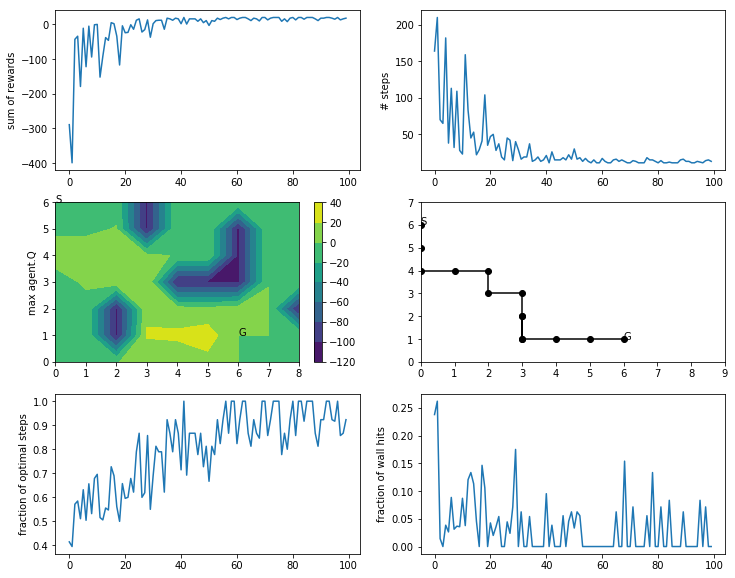

In [10]:
plot_train(agent, rtrace, steps, traces, trace, start)

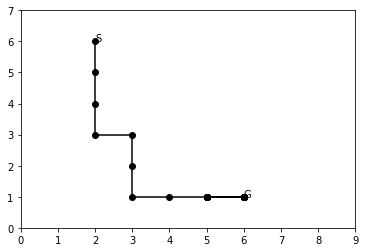

In [11]:
test_start = [0,2]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

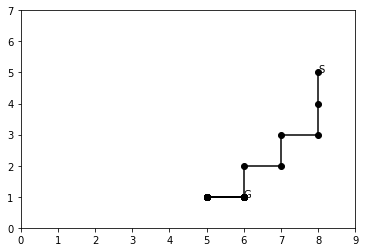

In [12]:
test_start = [1,8]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

### Experiments with other parameters
In this section, several values of parameters (alpha, gamma, epsilon, maxiter, maxstep) are tested, and their effects are observed for Maze problem.

#### Alpha values
The alpha value, also called "Learning Rate", affects the convergence towards optimal Q-values. Too low alpha value may lead to slower optimization, while too large may overshoot the Q-values. Here all possible values of alpha from 0.1 to 1 (with a step size of 0.1) are tested.

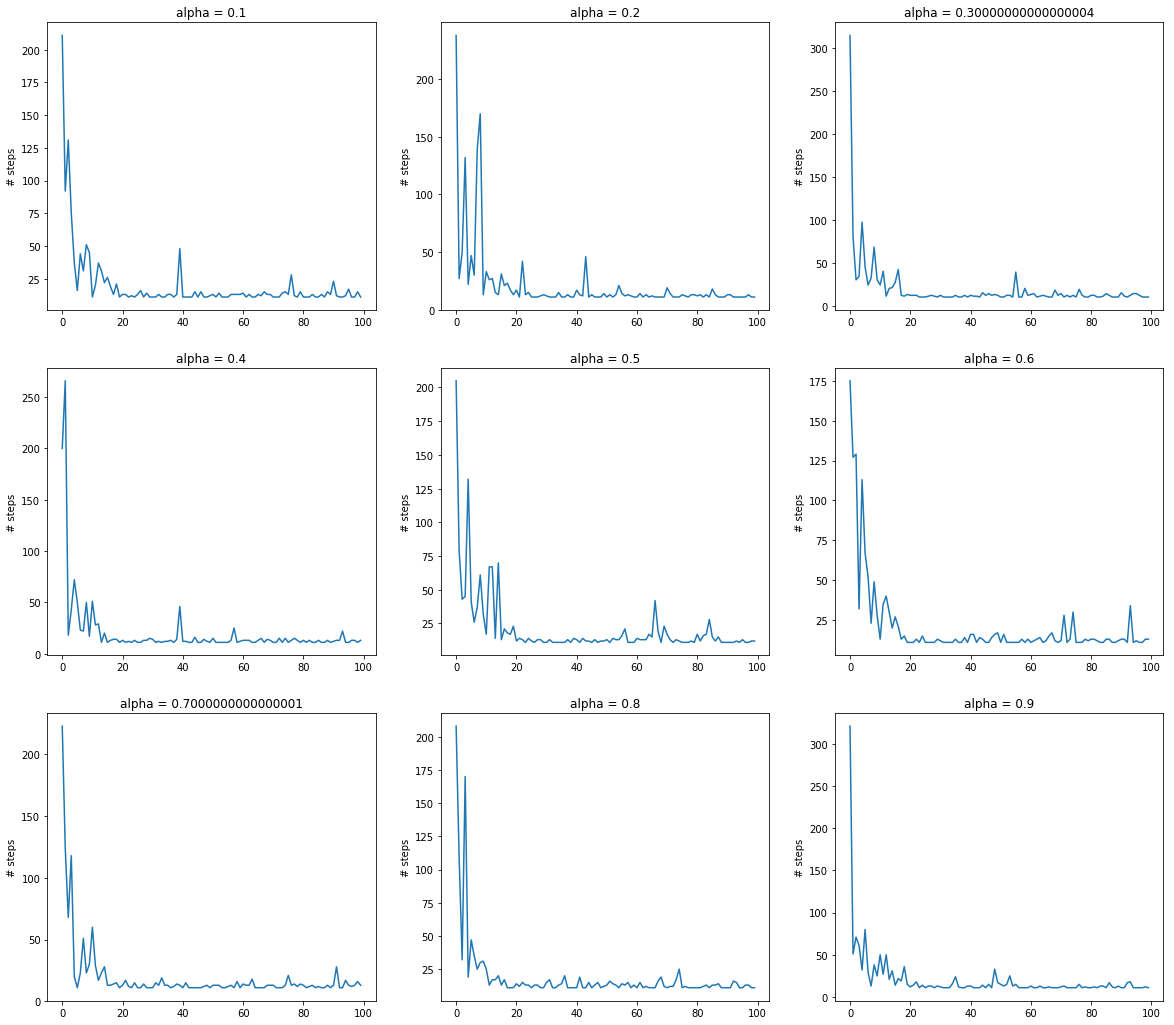

In [13]:
alphas = np.arange(0.1, 1, 0.1)

fig = plt.figure(figsize=(20,18))
col = 3
row = math.ceil(len(alphas) / col)

for i, alpha in enumerate(alphas):
    rtrace, steps, traces, trace = agent.train(start, 
                                       gamma=0.99, 
                                       alpha=0.5, 
                                       epsilon=0.1, 
                                       maxiter=100, 
                                       maxstep=1000)
    ax = fig.add_subplot(row, col, i + 1)
    plt.plot(steps)
    plt.ylabel('# steps')
    plt.title('alpha = ' + str(alpha))
plt.show()

From the above plots, we can observe that for higher values of alpha, the tail of the plot is less smoother. Even if we execute the experiment several times, the best observation most of the time will be from alpha = 0.1 and alpha = 0.2. So these are the most optimal values for the learning rate in my opinion.

#### Gamma values
The $\gamma$, represents discounting factor, which means discounting the effect of change in Q value. Because of that, the model gives bad results.

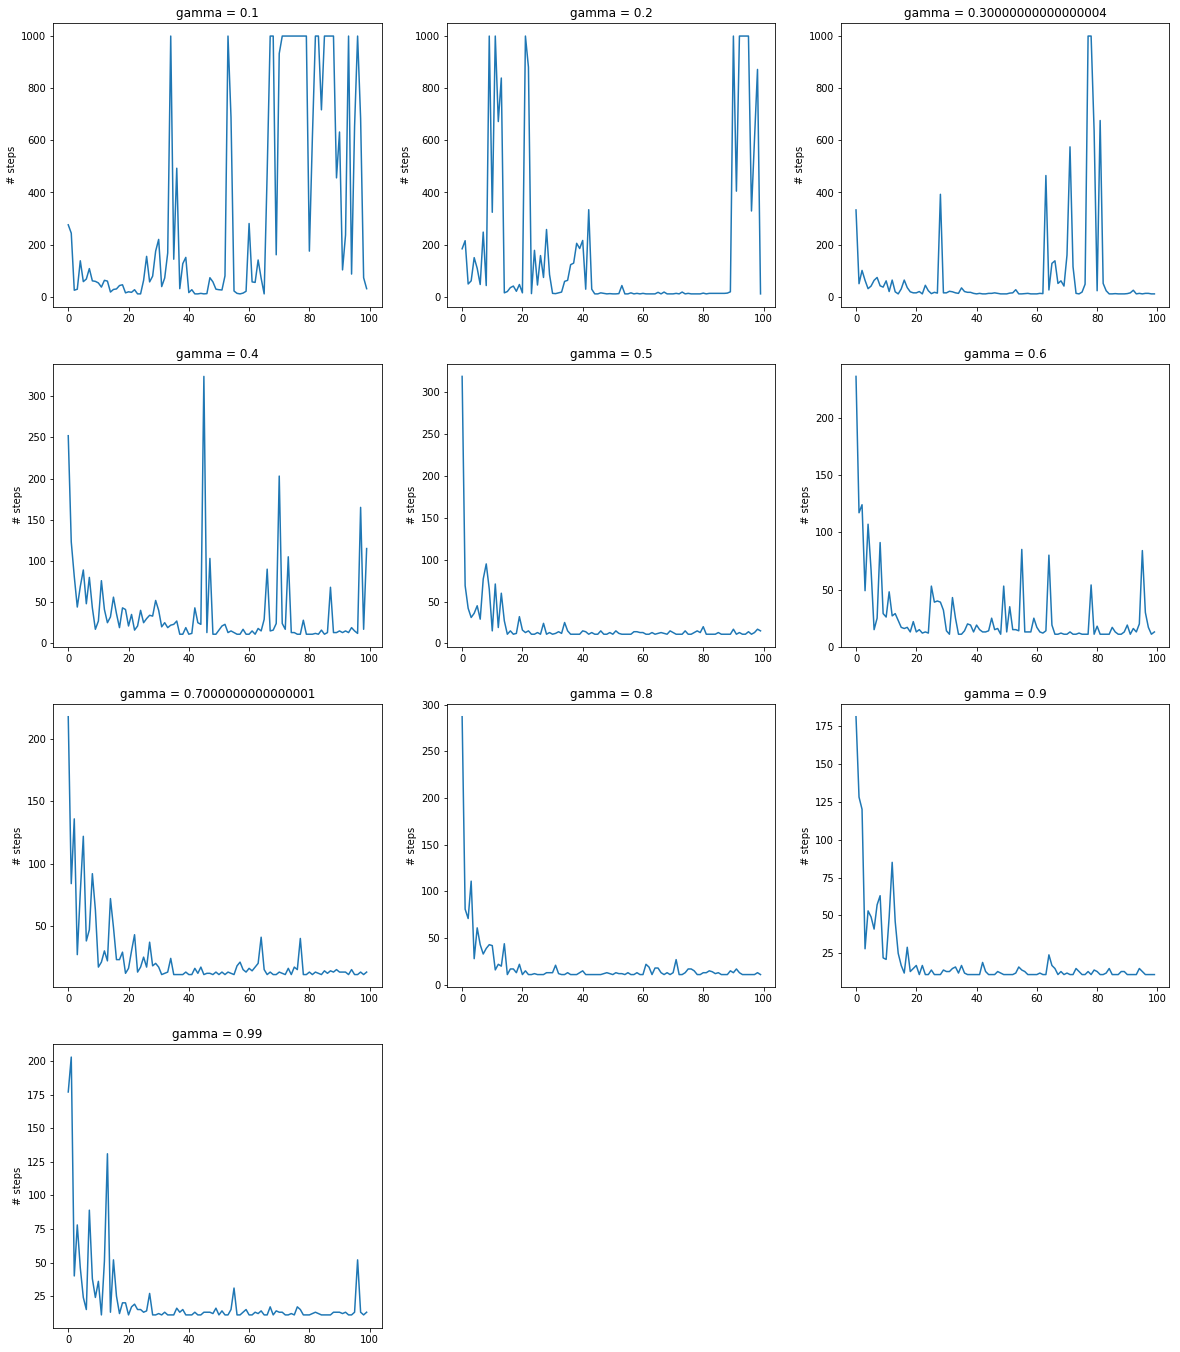

In [14]:
gammas = np.arange(0.1, 1, 0.1)
gammas = np.hstack((gammas, [0.99]))

fig = plt.figure(figsize=(20,24))
col = 3
row = math.ceil(len(gammas) / col)

for i, gamma in enumerate(gammas):
    rtrace, steps, traces, trace = agent.train(start, 
                                       gamma=gamma, 
                                       alpha=0.5, 
                                       epsilon=0.1, 
                                       maxiter=100, 
                                       maxstep=1000)
    ax = fig.add_subplot(row, col, i + 1)
    plt.plot(steps)
    plt.ylabel('# steps')
    plt.title('gamma = ' + str(gamma))
plt.show()

From the above plots, it is clear that the lesser values of $\gamma$ does not reach to the convergence or reach their very late. The reason being, effect of difference in Q-values are to much discounted. The ideal values for $\gamma$ in my opinion should be between 0.7 to 0.99

#### Epsilon value
By increasing epsilon, we are allowing agent to traverse non-optimal areas as well. The results with various values of $\epsilon$ are as follows

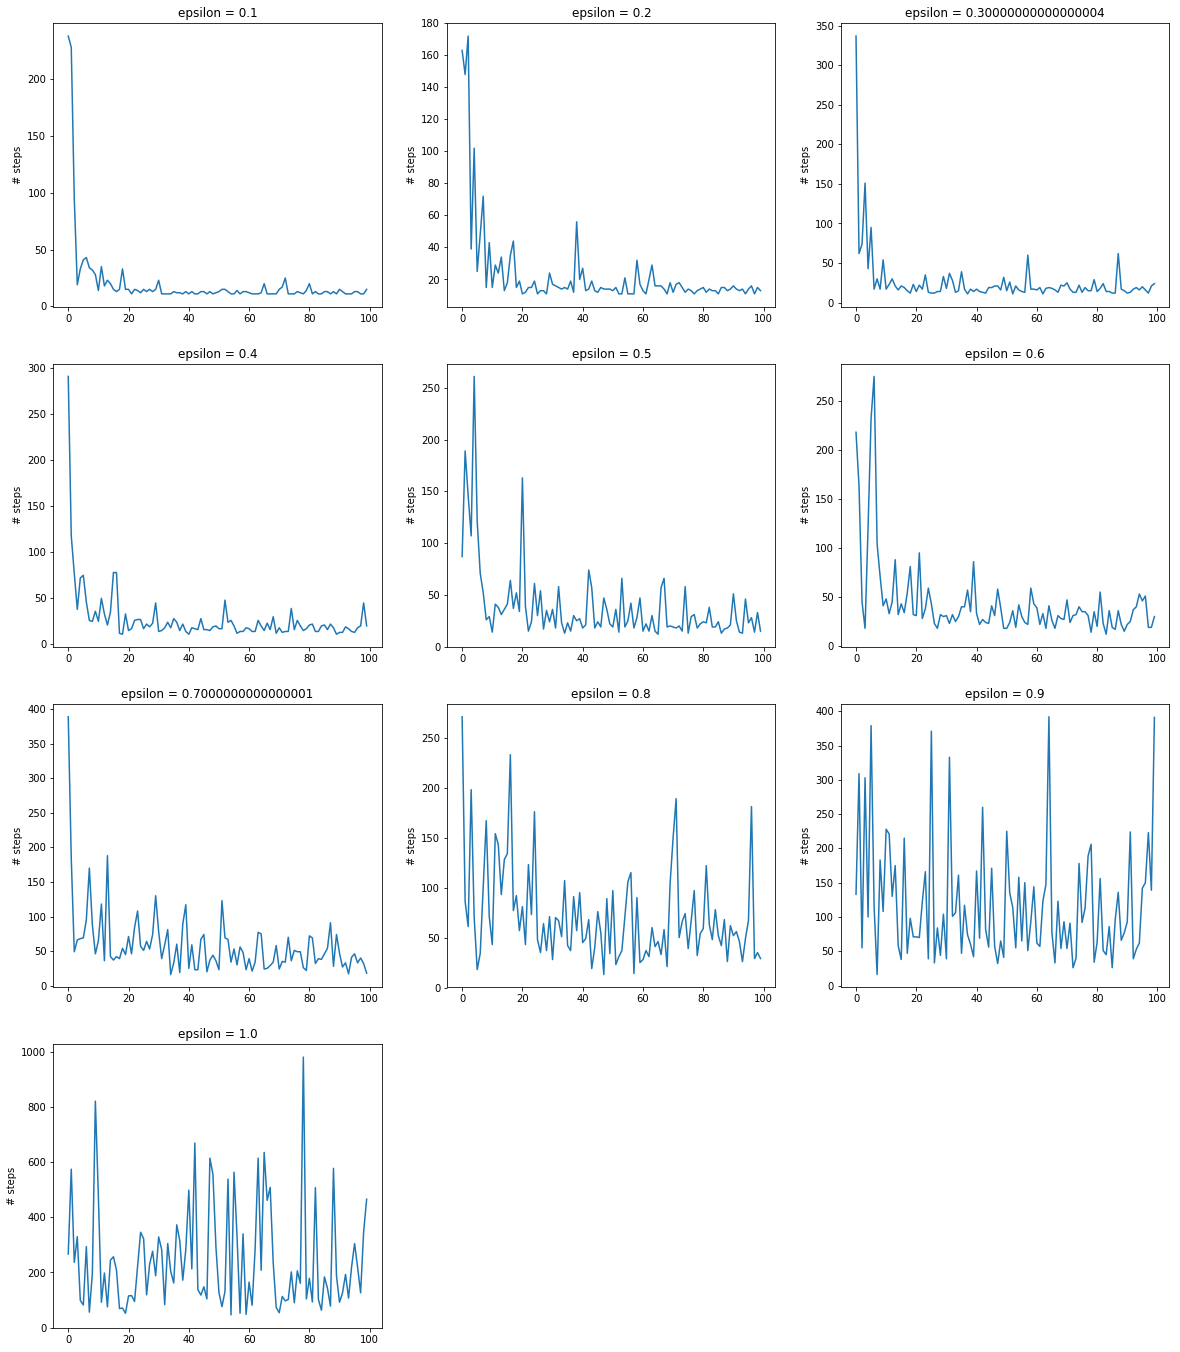

In [15]:
epsilons = np.arange(0.1, 1.1, 0.1)

fig = plt.figure(figsize=(20,24))
col = 3
row = math.ceil(len(epsilons) / col)

for i, epsilon in enumerate(epsilons):
    rtrace, steps, traces, trace = agent.train(start, 
                                       gamma=0.99, 
                                       alpha=0.5, 
                                       epsilon=epsilon, 
                                       maxiter=100, 
                                       maxstep=1000)
    ax = fig.add_subplot(row, col, i + 1)
    plt.plot(steps)
    plt.ylabel('# steps')
    plt.title('epsilon = ' + str(epsilon))
plt.show()

Higher values of $\epsilon$ gives more randomization. For $\epsilon$ = 1, always random states are selected. $\epsilon$ = 0.1 is the best comparative to other values.

#### Maximum Iterations

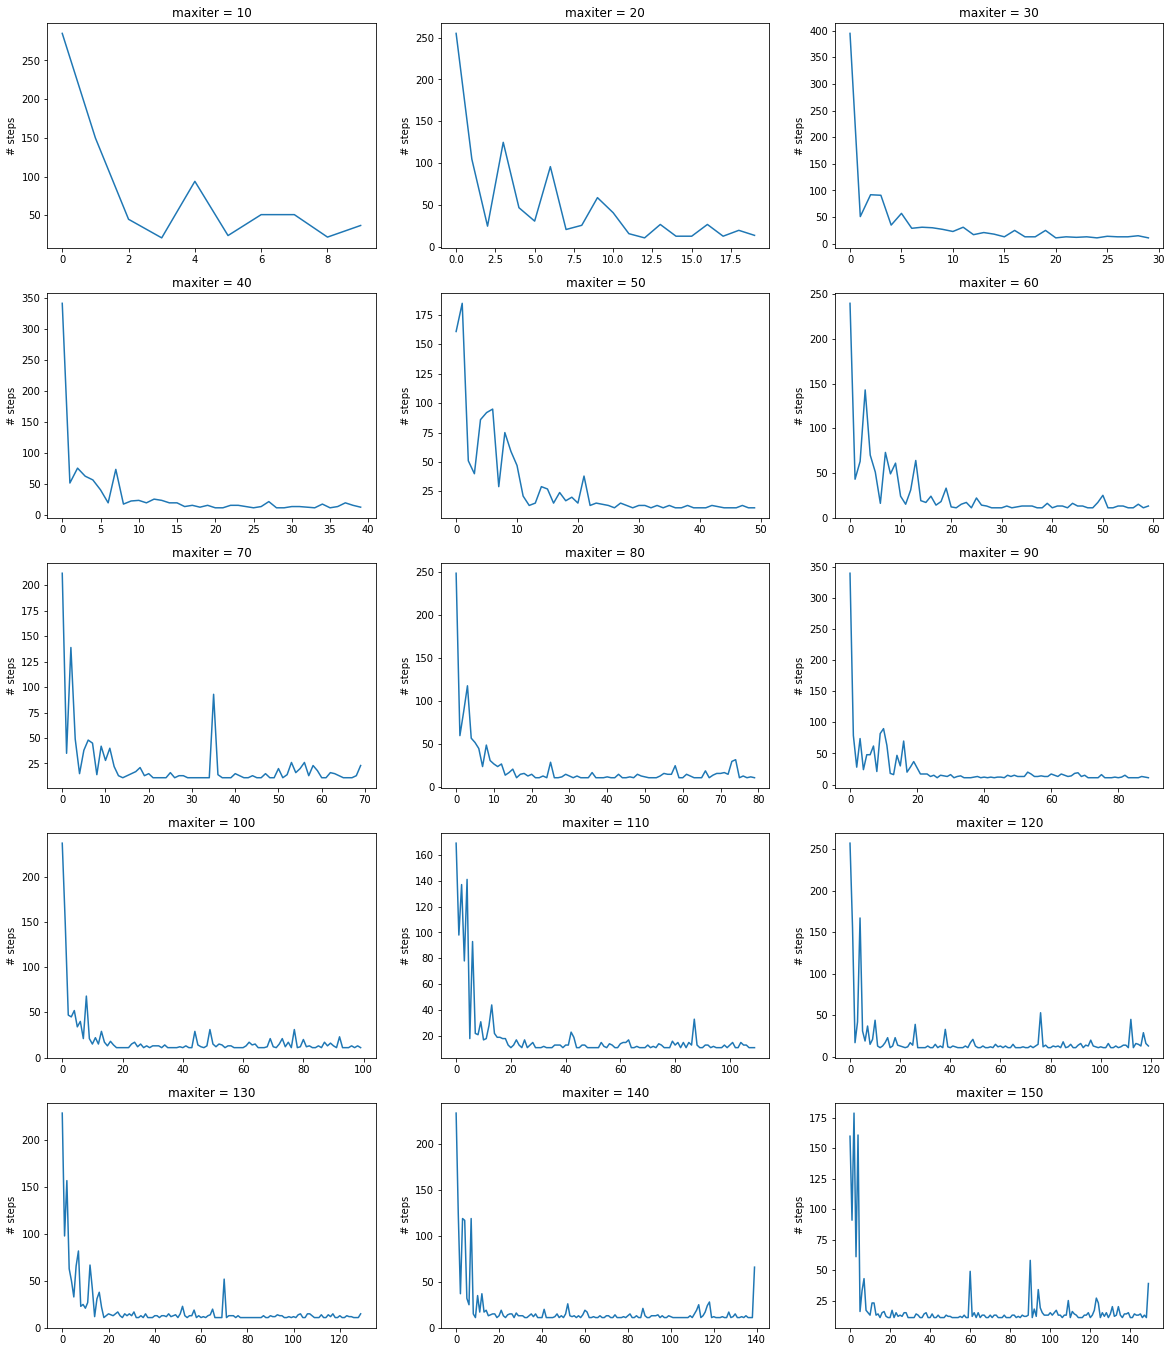

In [16]:
maxiters = np.arange(10, 160, 10)

fig = plt.figure(figsize=(20,24))
col = 3
row = math.ceil(len(maxiters) / col)

for i, maxiter in enumerate(maxiters):
    rtrace, steps, traces, trace = agent.train(start, 
                                       gamma=0.99, 
                                       alpha=0.5, 
                                       epsilon=0.1, 
                                       maxiter=maxiter, 
                                       maxstep=1000)
    ax = fig.add_subplot(row, col, i + 1)
    plt.plot(steps)
    plt.ylabel('# steps')
    plt.title('maxiter = ' + str(maxiter))
plt.show()

Even though, very less number of iterations does not give optimal Q-values, for large iterations, the model sometimes tend to jump off from the optimal. For the given maze size, the minimum number of iterations required is 80.

#### Maximum Steps

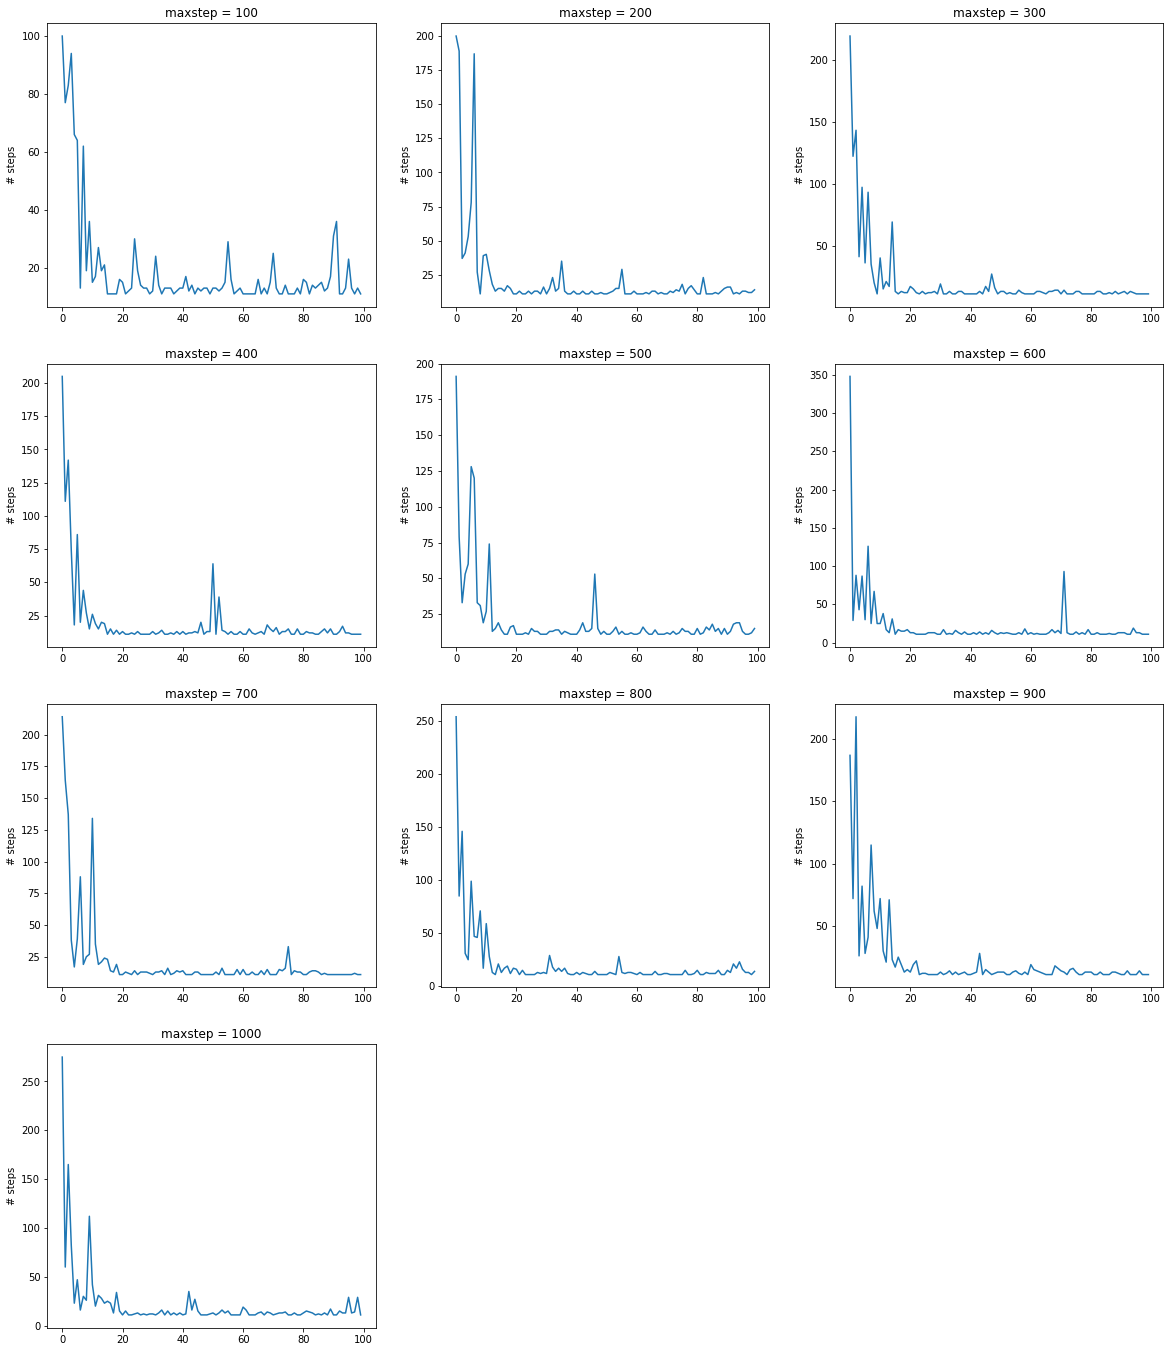

In [17]:
maxsteps = np.arange(100, 1100, 100)

fig = plt.figure(figsize=(20,24))
col = 3
row = math.ceil(len(maxsteps) / col)

for i, maxstep in enumerate(maxsteps):
    rtrace, steps, traces, trace = agent.train(start, 
                                       gamma=0.99, 
                                       alpha=0.5, 
                                       epsilon=0.1, 
                                       maxiter=100,
                                       maxstep=maxstep)
    ax = fig.add_subplot(row, col, i + 1)
    plt.plot(steps)
    plt.ylabel('# steps')
    plt.title('maxstep = ' + str(maxstep))
plt.show()

From the above graphs, it is clear that for the given maze size, we do not need 1000 steps / iteration. The model starts converging well at 300 steps. Reducing the number of steps will increase the performance of the model.

### Optimal parameter combinations
From the above experiments, we can come up with an optimal set of parameters which improves the performance and efficiency of the model.
Here are some sample sets:

#### Sample Set 1
$\gamma$ = 0.7
$\alpha$ = 0.2
$\epsilon$ = 0.1
maxiter = 80
maxstep = 300

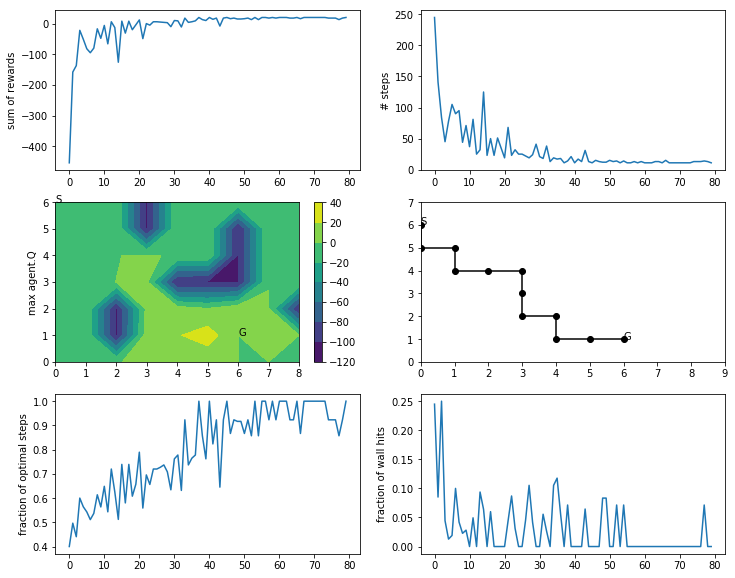

In [18]:
rtrace, steps, traces, trace = agent.train(start, 
                                   gamma=0.70, 
                                   alpha=0.2, 
                                   epsilon=0.1, 
                                   maxiter=80, 
                                   maxstep=300)
plot_train(agent, rtrace, steps, traces, trace, start)

#### Sample Set 2
$\gamma$ = 0.9
$\alpha$ = 0.5
$\epsilon$ = 0.1
maxiter = 100
maxstep = 500

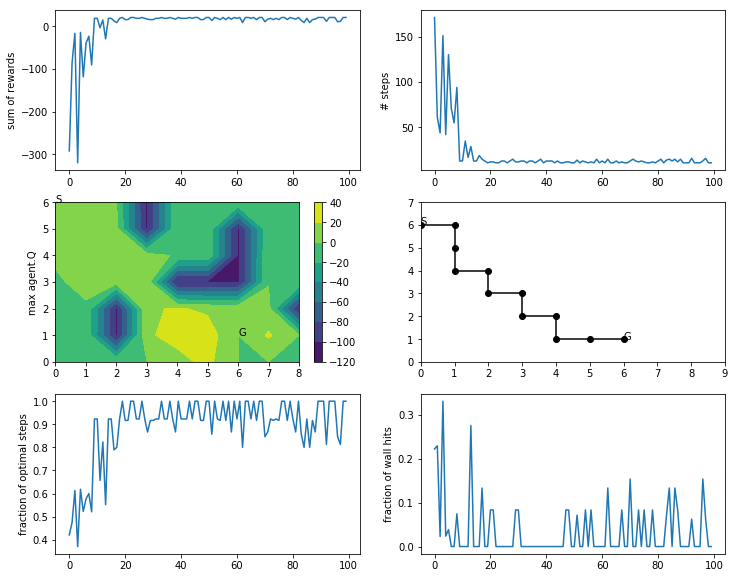

In [19]:
rtrace, steps, traces, trace = agent.train(start, 
                                   gamma=0.90, 
                                   alpha=0.5, 
                                   epsilon=0.1,
                                   maxiter=100, 
                                   maxstep=500)
plot_train(agent, rtrace, steps, traces, trace, start)

## BlackJack

### Utility functions for the BlackJack plotting

In [20]:
def plot_blackjack(win, loss, draw, rewards, busts, maxgames):
    print('Win = ' + str(win) + ', Loss = ' + str(loss) + ', Draw = ' + str(draw))

    # fraction of hit/miss for each hand
    counts = {}
    for obs in agent.Q.keys():
        hand = obs[0]
        q = agent.Q[obs]

        if hand not in counts:
            counts[hand] = [0, 0]

        if q[0] > q[1]:
            counts[hand][0] += 1
        elif q[0] < q[1]:
            counts[hand][1] += 1
        else:
            counts[hand][0] += 1
            counts[hand][1] += 1

    hands = list(counts.keys())
    hands.sort()

    fig = plt.figure(figsize=(20,18))
    ax = fig.add_subplot(321)

    plt.bar([hand - 0.2 for hand in hands], [counts[hand][0] / (counts[hand][0] + counts[hand][1]) for hand in hands], width=0.4, align='center', label='Stay')
    plt.bar([hand + 0.2 for hand in hands], [counts[hand][1] / (counts[hand][0] + counts[hand][1]) for hand in hands], width=0.4, align='center', label='Hit')
    plt.title("fraction of stay and hit")
    plt.ylabel("fraction")
    plt.xticks(hands)
    plt.legend()

    # number of busts and average rewards in interval
    interval = 1 if maxgames < 50 else maxgames // 50
    num_busts = []
    avg_rewards = []
    fraction_win = []
    fraction_draw = []
    fraction_loss = []

    i = 0
    while i < maxgames:
        num_busts.append(sum(busts[i:interval + i]))
        avg_rewards.append(np.mean(rewards[i:interval + i]))
        fraction_win.append((rewards[i:interval + i].count(1) + rewards[i:interval + i].count(1.5)) / interval)
        fraction_draw.append((rewards[i:interval + i].count(0)) / interval)
        fraction_loss.append((rewards[i:interval + i].count(-1)) / interval)
        i += interval

    # Win/Draw/Loss rate
    ax = fig.add_subplot(322)
    plt.plot(np.arange(0, maxgames, maxgames // 50), fraction_win, label='win')
    plt.plot(np.arange(0, maxgames, maxgames // 50), fraction_draw, label='draw')
    plt.plot(np.arange(0, maxgames, maxgames // 50), fraction_loss, label='loss')
    plt.legend()
    plt.ylabel('win/loss/draw rate')

    # Number of busts
    ax = fig.add_subplot(323)
    plt.plot(np.arange(0, maxgames, maxgames // 50), num_busts)
    plt.ylabel("number of busts")

    # Average Rewards
    ax = fig.add_subplot(324)
    plt.plot(np.arange(0, maxgames, maxgames // 50), avg_rewards)
    plt.ylabel("average rewards")

    plt.show()

Following plots are made for the BlackJack training.
- The bar plot indicates average Q values for "Hits" and "Stay" as per the hands. We can see that above 17, the agent will always stay. However, below 12, the agent will always hit
- The second graph indicates win vs loss vs draw in the interval
- The main aim of the training is to reduce busts. Third plot indicates average number of busts in the interval
- Fourth plot indicates average rewards achieved in the interval.

The values in these plots are averaged on an interval of maxgames / 50.

For the training, the agent plays 1000 games and update the Q values based on the outcome of each action performed. The parameters chosen for the training are
- $\gamma$ = 0.99
- $\alpha$ = 0.1
- $\epsilon$ = 0.1

Win = 401, Loss = 536, Draw = 63


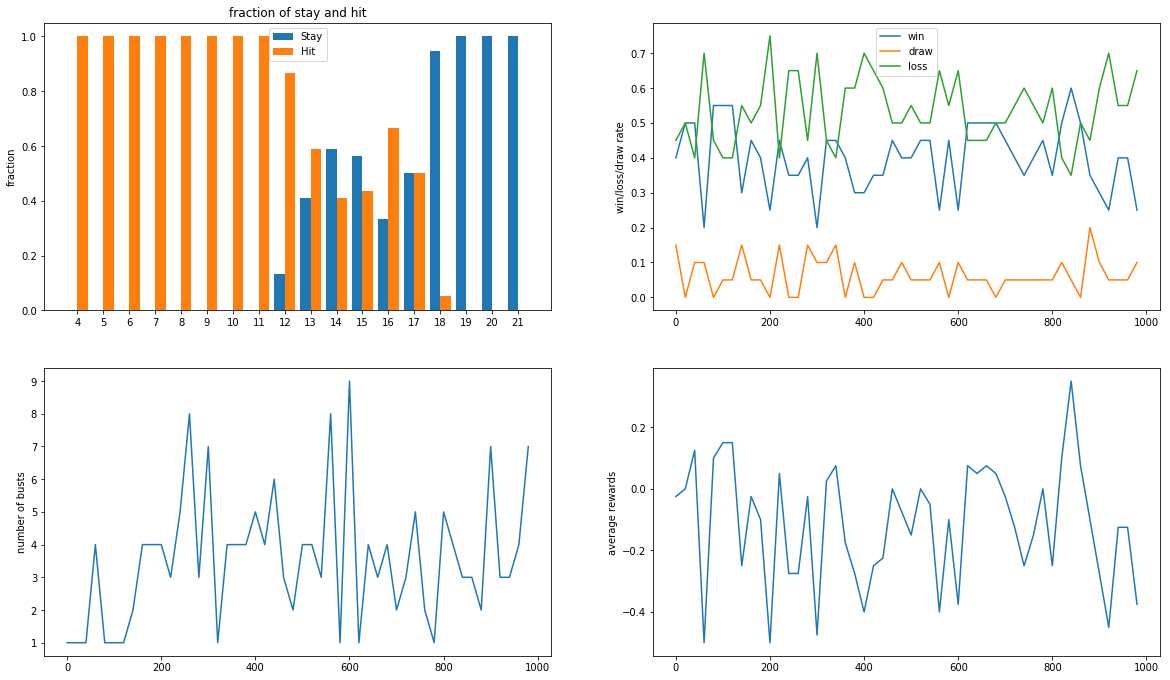

In [21]:
env = BlackjackEnv(natural=True)
agent = RLBlackJack(env)
maxgames = 1000
win, loss, draw, rewards, busts = agent.train(gamma=0.99, 
                                               alpha=0.1, 
                                               epsilon=0.1, 
                                               maxgames=maxgames)
plot_blackjack(win, loss, draw, rewards, busts, maxgames)

In [22]:
from IPython.display import display, Markdown, HTML
import tabulate

ngames = 10
win = 0
loss = 0
draw = 0

for i in range(ngames):    
    r, trace, actions = agent.test()
    if r > 0:
        outcome = 'Won'
        win += 1
    elif r == 0:
        outcome = 'Draw'
        draw += 1
    else:
        outcome = 'Lost'
        loss += 1
        
    display(Markdown('**Game ' + str(i + 1) + ' (' + outcome + ')**'))
    output = [['Hand', 'Ace', 'Dealer', 'Action']]
    for j in range(len(actions)):
        output.append([trace[j][0], ('Yes' if trace[j][2] else 'No'), trace[j][1], \
            ('Stay' if actions[j] == 0 else 'Hit')])
    
    if actions[j] == 1:
        output.append([trace[j + 1][0], ('Yes' if trace[j + 1][2] else 'No'), trace[j + 1][1], \
            ''])

    display(HTML(tabulate.tabulate(output, tablefmt='html')))
    
print('Win = ' + str(win) + ', Loss = ' + str(loss) + ', Draw = ' + str(draw))
    

**Game 1 (Won)**

Hand,Ace,Dealer,Action
8,No,9,Hit
18,No,9,Stay


**Game 2 (Lost)**

Hand,Ace,Dealer,Action
12,No,10,Hit
19,No,10,Stay


**Game 3 (Lost)**

Hand,Ace,Dealer,Action
15,No,6,Stay


**Game 4 (Lost)**

Hand,Ace,Dealer,Action
7,No,4,Hit
11,No,4,Hit
14,No,4,Stay


**Game 5 (Won)**

Hand,Ace,Dealer,Action
21,Yes,4,Stay


**Game 6 (Won)**

Hand,Ace,Dealer,Action
10,No,10,Hit
14,No,10,Stay


**Game 7 (Lost)**

Hand,Ace,Dealer,Action
14,No,10,Stay


**Game 8 (Won)**

Hand,Ace,Dealer,Action
17,No,3,Stay


**Game 9 (Lost)**

Hand,Ace,Dealer,Action
13,No,10,Hit
23,No,10,


**Game 10 (Won)**

Hand,Ace,Dealer,Action
13,No,4,Stay


Win = 5, Loss = 5, Draw = 0


### Experiments with other parameters
In this section, several values of parameters (alpha, gamma, epsilon, maxiter, maxstep) are tested, and their effects are observed for the BlackJack problem.

#### Alpha values
The alpha value, also called "Learning Rate", affects the convergence towards optimal Q-values. Too low alpha value may lead to slower optimization, while too large may overshoot the Q-values. Here all possible values of alpha from 0.1 to 1 (with a step size of 0.1) are tested.

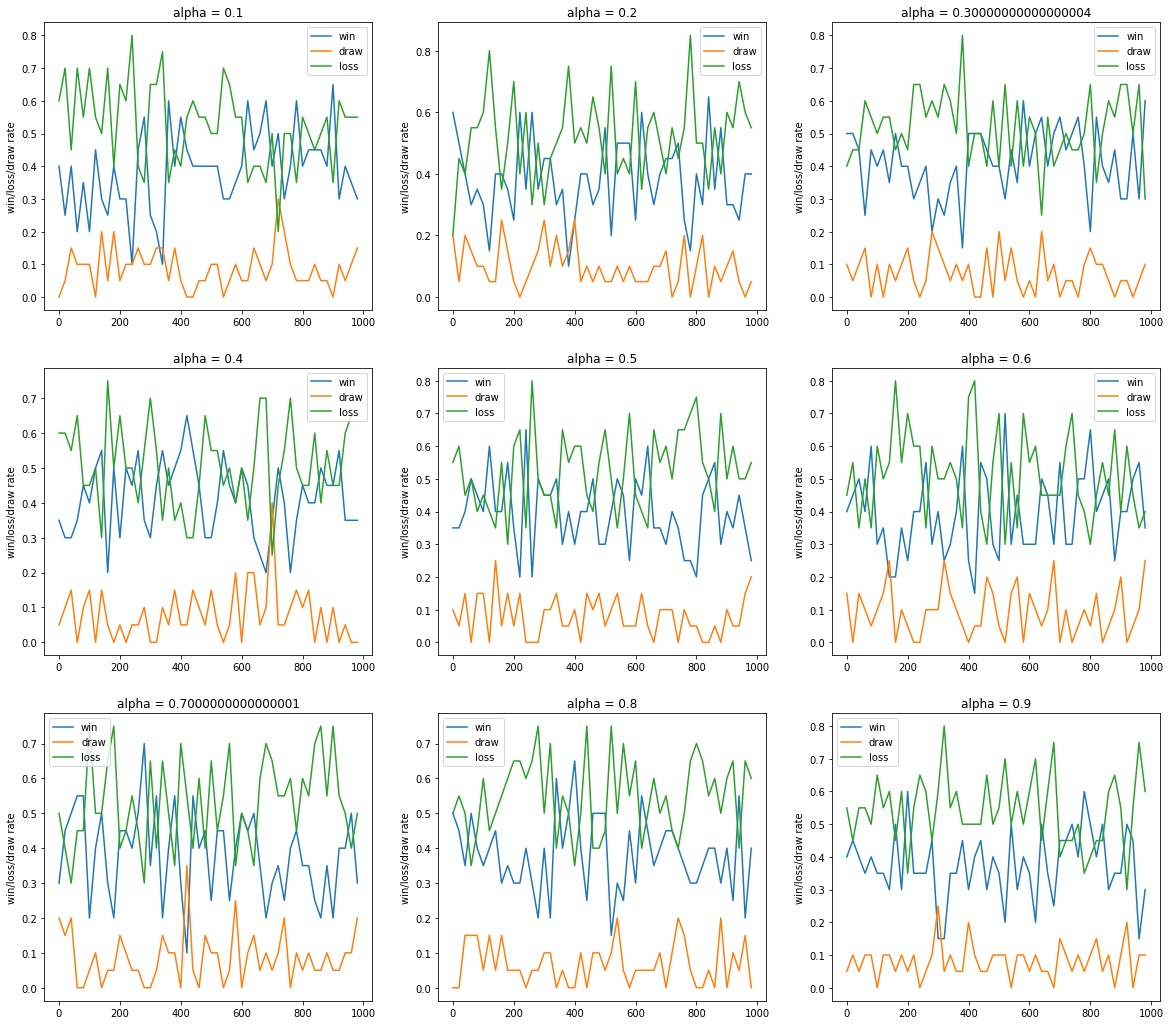

In [23]:
alphas = np.arange(0.1, 1, 0.1)

fig = plt.figure(figsize=(20,18))
col = 3
row = math.ceil(len(alphas) / col)

for j, alpha in enumerate(alphas):
    maxgames = 1000
    win, loss, draw, rewards, busts = agent.train(gamma=0.99, 
                                                   alpha=alpha, 
                                                   epsilon=0.1, 
                                                   maxgames=maxgames)
    
    # number of busts and average rewards in interval
    interval = 1 if maxgames < 50 else maxgames // 50
    num_busts = []
    avg_rewards = []
    fraction_win = []
    fraction_draw = []
    fraction_loss = []
    
    i = 0
    while i < maxgames:
        fraction_win.append((rewards[i:interval + i].count(1) + rewards[i:interval + i].count(1.5)) / interval)
        fraction_draw.append((rewards[i:interval + i].count(0)) / interval)
        fraction_loss.append((rewards[i:interval + i].count(-1)) / interval)
        i += interval

    # Win/Draw/Loss rate
    ax = fig.add_subplot(row, col, j + 1)
    plt.plot(np.arange(0, maxgames, maxgames // 50), fraction_win, label='win')
    plt.plot(np.arange(0, maxgames, maxgames // 50), fraction_draw, label='draw')
    plt.plot(np.arange(0, maxgames, maxgames // 50), fraction_loss, label='loss')
    plt.legend()
    plt.ylabel('win/loss/draw rate')
    plt.title('alpha = ' + str(alpha))
    
plt.show()

From the above graphs, we can observe that the good values of $\alpha$ are less than 0.6, while others are very bad. On an average number of attempts of this experiment, 0.5 works better.

#### Gamma Values
The $\gamma$, represents discounting factor, which means discounting the effect of change in Q value. Because of that, the model gives bad results.

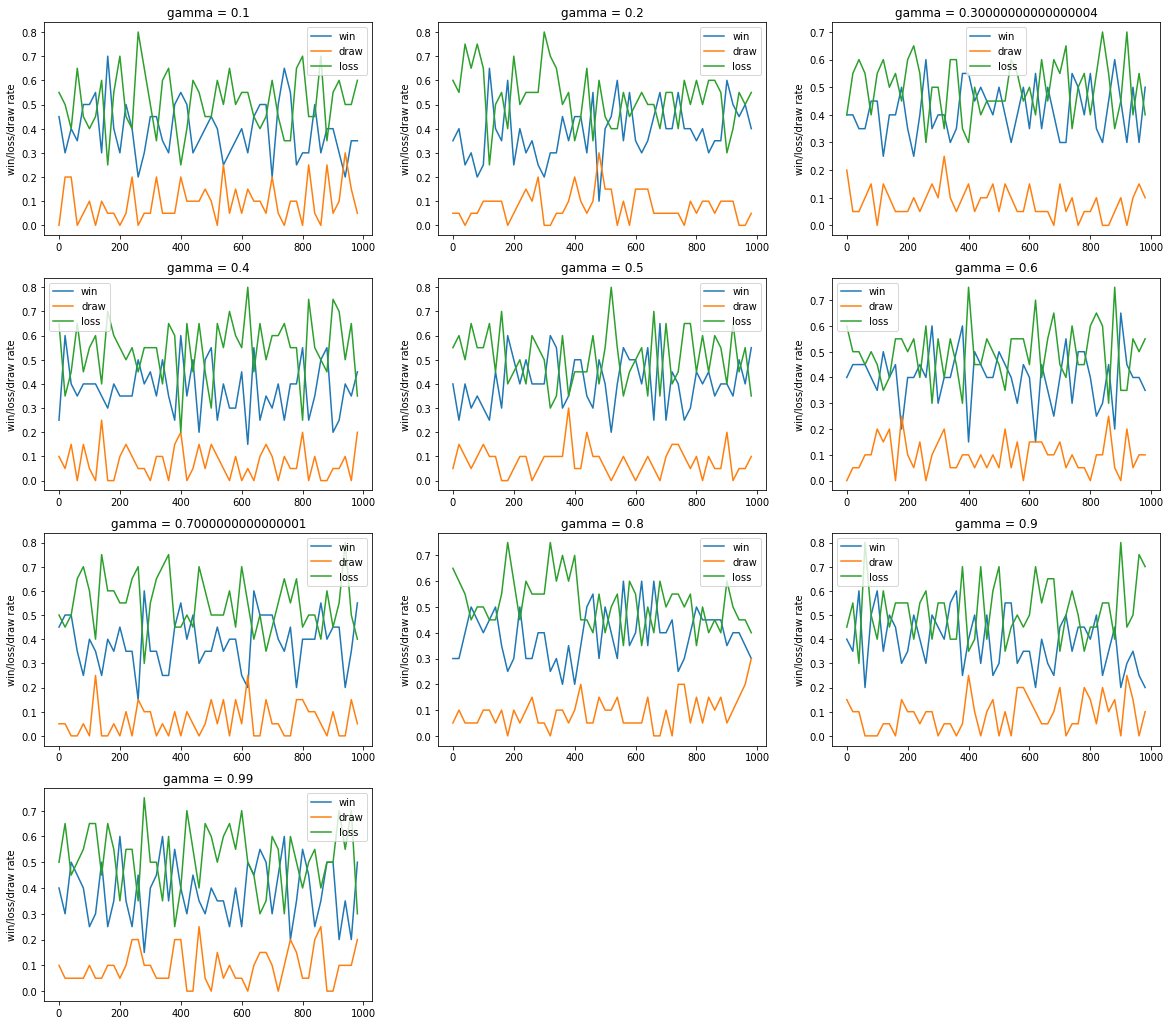

In [24]:
gammas = np.arange(0.1, 1, 0.1)
gammas = np.hstack((gammas, [0.99]))

fig = plt.figure(figsize=(20,18))
col = 3
row = math.ceil(len(gammas) / col)

for j, gamma in enumerate(gammas):
    maxgames = 1000
    win, loss, draw, rewards, busts = agent.train(gamma=gamma, 
                                                   alpha=0.1, 
                                                   epsilon=0.1, 
                                                   maxgames=maxgames)
    
    # number of busts and average rewards in interval
    interval = 1 if maxgames < 50 else maxgames // 50
    num_busts = []
    avg_rewards = []
    fraction_win = []
    fraction_draw = []
    fraction_loss = []
    
    i = 0
    while i < maxgames:
        fraction_win.append((rewards[i:interval + i].count(1) + rewards[i:interval + i].count(1.5)) / interval)
        fraction_draw.append((rewards[i:interval + i].count(0)) / interval)
        fraction_loss.append((rewards[i:interval + i].count(-1)) / interval)
        i += interval

    # Win/Draw/Loss rate
    ax = fig.add_subplot(row, col, j + 1)
    plt.plot(np.arange(0, maxgames, maxgames // 50), fraction_win, label='win')
    plt.plot(np.arange(0, maxgames, maxgames // 50), fraction_draw, label='draw')
    plt.plot(np.arange(0, maxgames, maxgames // 50), fraction_loss, label='loss')
    plt.legend()
    plt.ylabel('win/loss/draw rate')
    plt.title('gamma = ' + str(gamma))
    
plt.show()

Like the previous experiment, the lower values of $\gamma$ are comparatively bad.

#### Epsilon Value

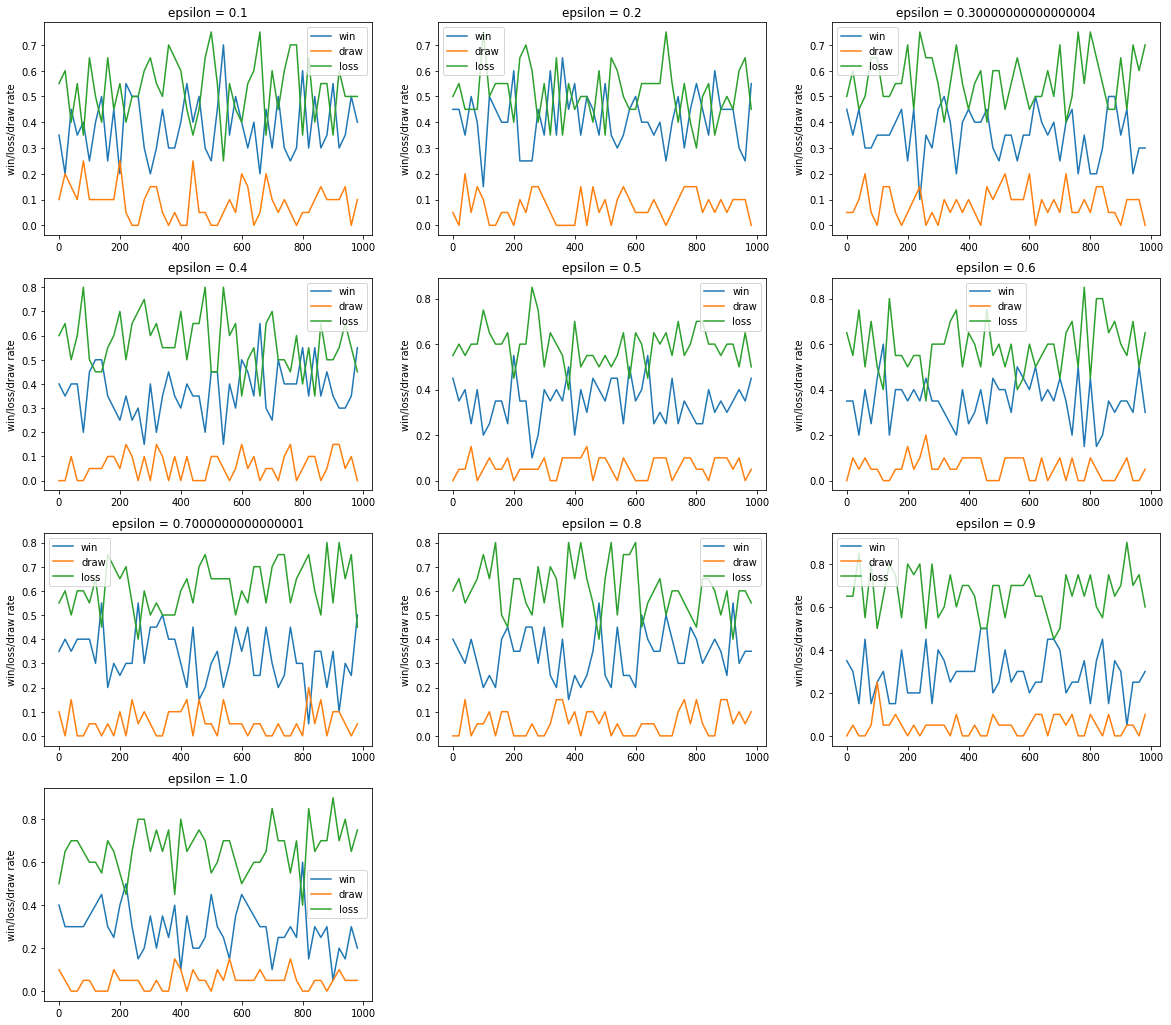

In [25]:
epsilons = np.arange(0.1, 1.1, 0.1)

fig = plt.figure(figsize=(20,18))
col = 3
row = math.ceil(len(epsilons) / col)

for j, epsilon in enumerate(epsilons):
    maxgames = 1000
    win, loss, draw, rewards, busts = agent.train(gamma=0.99, 
                                                   alpha=0.1, 
                                                   epsilon=epsilon, 
                                                   maxgames=maxgames)
    
    # number of busts and average rewards in interval
    interval = 1 if maxgames < 50 else maxgames // 50
    num_busts = []
    avg_rewards = []
    fraction_win = []
    fraction_draw = []
    fraction_loss = []
    
    i = 0
    while i < maxgames:
        fraction_win.append((rewards[i:interval + i].count(1) + rewards[i:interval + i].count(1.5)) / interval)
        fraction_draw.append((rewards[i:interval + i].count(0)) / interval)
        fraction_loss.append((rewards[i:interval + i].count(-1)) / interval)
        i += interval

    # Win/Draw/Loss rate
    ax = fig.add_subplot(row, col, j + 1)
    plt.plot(np.arange(0, maxgames, maxgames // 50), fraction_win, label='win')
    plt.plot(np.arange(0, maxgames, maxgames // 50), fraction_draw, label='draw')
    plt.plot(np.arange(0, maxgames, maxgames // 50), fraction_loss, label='loss')
    plt.legend()
    plt.ylabel('win/loss/draw rate')
    plt.title('epsilon = ' + str(epsilon))
    
plt.show()

We are having too many looses when the $\epsilon$ > 0.3. This means, the player is more frequently taking random actions. Therefore, the better values are 0.3 or less.

#### Maximum Number of Games

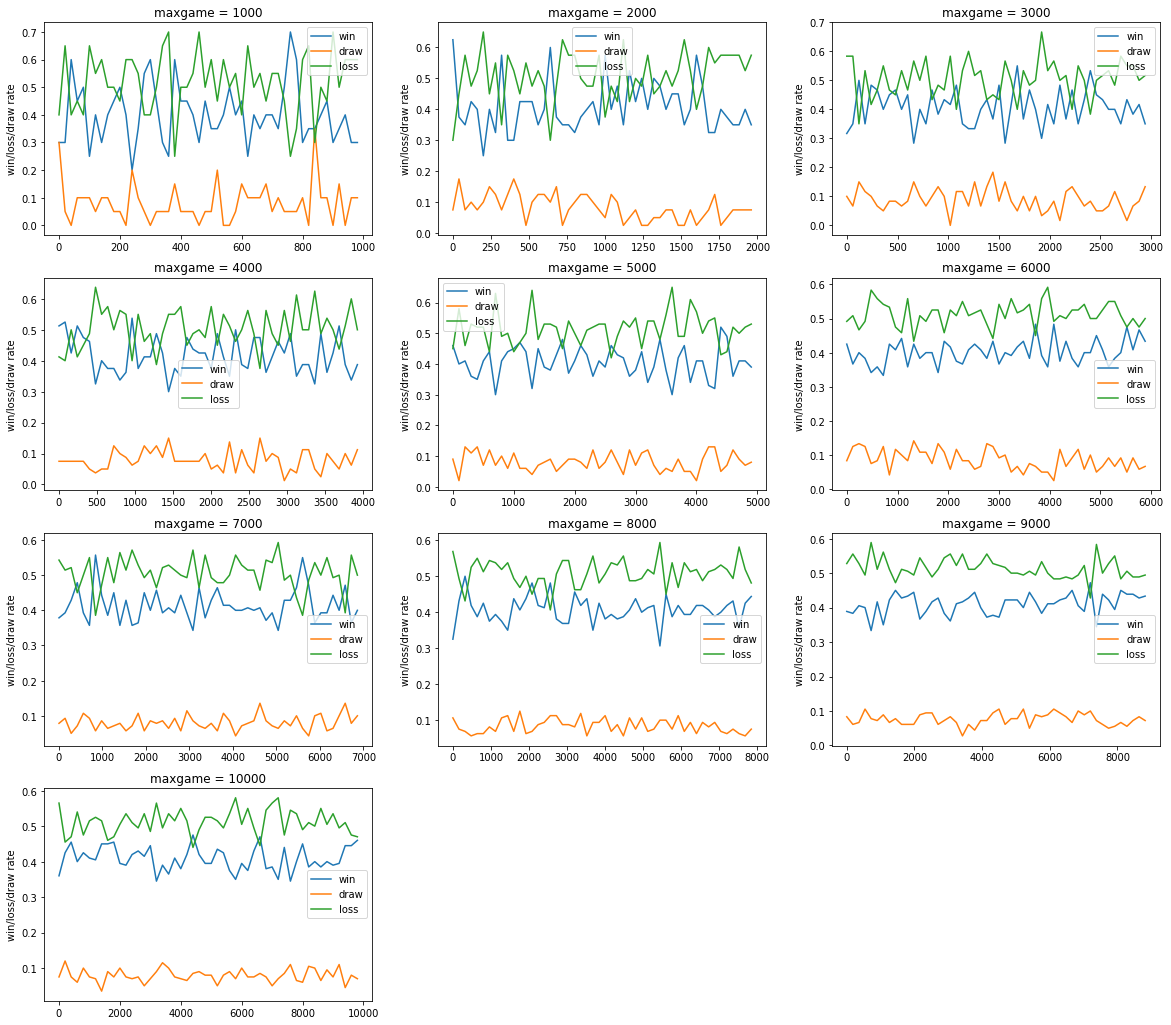

In [26]:
maxgames = np.arange(1000, 11000, 1000)

fig = plt.figure(figsize=(20,18))
col = 3
row = math.ceil(len(maxgames) / col)

for j, maxgame in enumerate(maxgames):
    win, loss, draw, rewards, busts = agent.train(gamma=0.99, 
                                                   alpha=0.1, 
                                                   epsilon=0.1, 
                                                   maxgames=maxgame)
    
    # number of busts and average rewards in interval
    interval = 1 if maxgame < 50 else maxgame // 50
    num_busts = []
    avg_rewards = []
    fraction_win = []
    fraction_draw = []
    fraction_loss = []
    
    i = 0
    while i < maxgame:
        fraction_win.append((rewards[i:interval + i].count(1) + rewards[i:interval + i].count(1.5)) / interval)
        fraction_draw.append((rewards[i:interval + i].count(0)) / interval)
        fraction_loss.append((rewards[i:interval + i].count(-1)) / interval)
        i += interval

    # Win/Draw/Loss rate
    ax = fig.add_subplot(row, col, j + 1)
    plt.plot(np.arange(0, maxgame, maxgame // 50), fraction_win, label='win')
    plt.plot(np.arange(0, maxgame, maxgame // 50), fraction_draw, label='draw')
    plt.plot(np.arange(0, maxgame, maxgame // 50), fraction_loss, label='loss')
    plt.legend()
    plt.ylabel('win/loss/draw rate')
    plt.title('maxgame = ' + str(maxgame))
    
plt.show()

As a great deal of randomization is involved in the BlackJack, the parameters does not converge towards perfect optimal with more number of games. Therefore, the ideal number of games in this case is 1000

### Optimal parameter combinations
From the above experiments, we can come up with an optimal set of parameters which improves the performance and efficiency of the model.
Here are some sample sets:

#### Sample Set 1
$\gamma$ = 0.8
$\alpha$ = 0.25
$\epsilon$ = 0.1
maxgames = 1000

Win = 386, Loss = 531, Draw = 83


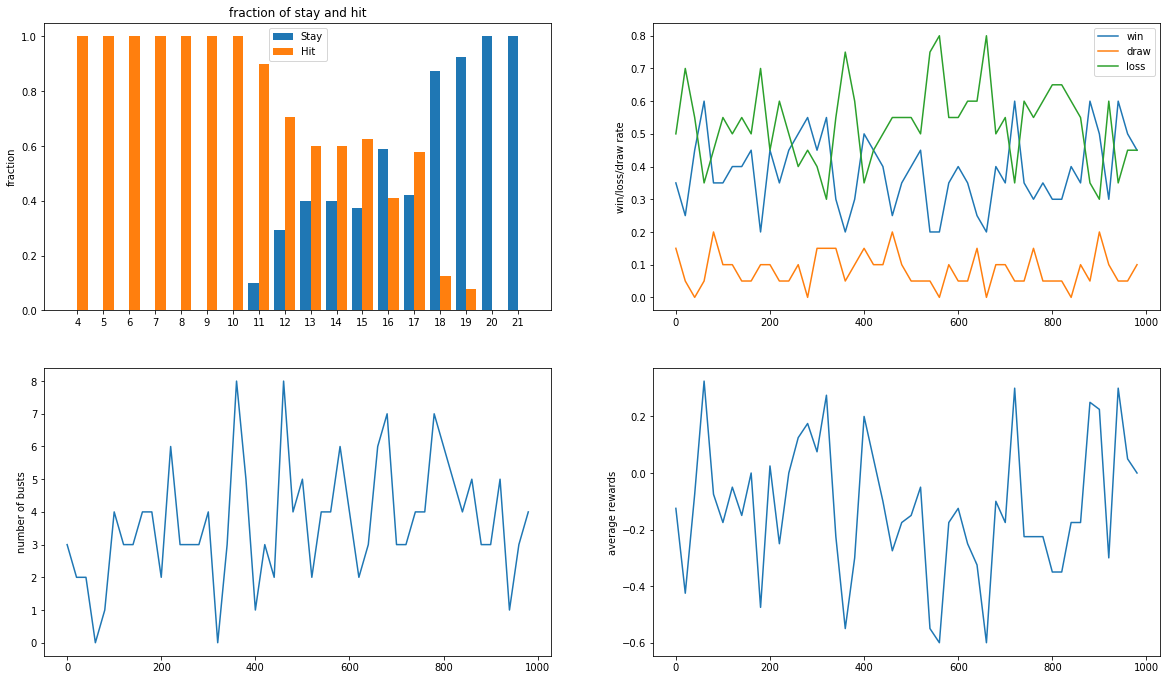

In [27]:
agent = RLBlackJack(env)
maxgames = 1000
win, loss, draw, rewards, busts = agent.train(gamma=0.8, 
                                               alpha=0.25, 
                                               epsilon=0.1, 
                                               maxgames=maxgames)
plot_blackjack(win, loss, draw, rewards, busts, maxgames)

# V. Conclusions

_Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it._

This assignment help in clearing the concepts behind Reinforcement Learning and TD Learning approaches. The challenges faced during this assignment are:
- Determining the good set of parameters for training. For this several parameters were tested. The results were show in the previous sections.
- Determining the plots for BlackJack

# Extra Credit

- Let us have Blackjack-V0 Tournament in class (Mar 22nd.)!
- Top 4 students will get an extra credit. 
- 2 (or more?) unique training attemps will also get an extra credit. (Sales for it to be considered.) 

## Grading

We will test your notebook with an additional grid.txt file. Please make sure to test in different maze input files. 

points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Maze Problem | 
 | 5| Includes description of maze problem
 | 5| Explains the GridWorld
10 | Blackjack
 | 5| Includes description of maze problem
 | 5| Explains the Backjack-V0 (OpenAI Gym)
25 | Methods | 
 | 5| Review of the SARSA and Q-Learning
 | 5| Choice of TD learning and Reason
 |10| Implementation of the selected approach
 | 5| explanation of the codes
45 | Results 
| 5| Reports the selected parameters for both problems. 
|20| Experimental outputs that show the choice of parameters. How do you choose them? (10 points per each problem)
|10| Output plots (5 for each)
|10| reading and analysis of learning results and plots (5 for each)
5 | Conclusions 
